In [1]:
import time
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from Utils import plot_wrong,process_data

In [2]:
# Process data. Data must be in Folder "./Data/fashion/"
PCA = 0.99 # explained variance kept with PCA
process_data(PCA,False)

In [3]:
# load processed data

x_train_99 = np.load(f'Data/Processed/x_train_{PCA}.npy')
x_test_99 = np.load(f'Data/Processed/x_test_{PCA}.npy')
y_train = np.load('Data/Processed/y_train.npy')
y_test = np.load('Data/Processed/y_test.npy')
# x_train_95 = np.load('Data/Processed/x_train_0.95.npy')
# x_test_95 = np.load('Data/Processed/x_test_0.95.npy')

In [4]:

# initialize classifiers
knn3_99 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn1_99 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
nc_99 = NearestCentroid()
# knn3_95 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
# knn1_95 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
# nc_95 = NearestCentroid()

In [5]:
# fit training data to classifiers
start = time.perf_counter()
knn3_99.fit(x_train_99, y_train)
mid = time.perf_counter()
knn1_99.fit(x_train_99, y_train)
mid2 = time.perf_counter()
nc_99.fit(x_train_99, y_train)
end = time.perf_counter()
print(f"knn3 fit time: {mid - start:0.5f}s")
print(f"knn1 fit time: {mid2 - mid:0.5f}s")
print(f"nc fit time: {end - mid2:0.5f}s")
# knn3_95.fit(x_train_95, y_train)
# knn1_95.fit(x_train_95, y_train)
# nc_95.fit(x_train_95, y_train)

knn3 fit time: 0.03710s
knn1 fit time: 0.03474s
nc fit time: 0.31159s


In [6]:
# predict outcomes with test data
start = time.perf_counter()
pred_399 = knn3_99.predict(x_test_99)
mid = time.perf_counter()
pred_199 = knn1_99.predict(x_test_99)
mid2 = time.perf_counter()
pred_c99 = nc_99.predict(x_test_99)
end = time.perf_counter()
print(f"knn3 predict time: {mid - start:0.5f}s")
print(f"knn1 predict time: {mid2 - mid:0.5f}s")
print(f"nc predict time: {end - mid2:0.5f}s")
# pred_395 = knn3_95.predict(x_test_95)
# pred_195 = knn1_95.predict(x_test_95)
# pred_c95 = nc_95.predict(x_test_95)

knn3 predict time: 14.47139s
knn1 predict time: 10.58561s
nc predict time: 0.01664s


In [7]:
# create confusion matrices to compare predicted outcomes with desired outcomes
cm_399 = confusion_matrix(y_test, pred_399)
cm_199 = confusion_matrix(y_test, pred_199)
cm_c99 = confusion_matrix(y_test, pred_c99)
# cm_395 = confusion_matrix(y_test, pred_395)
# cm_195 = confusion_matrix(y_test, pred_195)
# cm_c95 = confusion_matrix(y_test, pred_c95)

In [8]:
# accuracy of each classifier
m = y_test.shape[0]
print("knn_399: ", np.trace(cm_399) / m)
print("knn_199: ", np.trace(cm_199) / m)
print("nc_99: ", np.trace(cm_c99) / m)
# print("knn_395: ", np.trace(cm_395) / m)
# print("knn_195: ", np.trace(cm_195) / m)
# print("nc_95: ", np.trace(cm_c95) / m)

knn_399:  0.8566
knn_199:  0.8501
nc_99:  0.6769


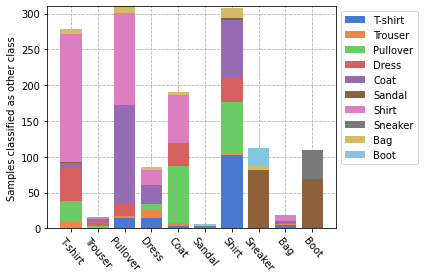

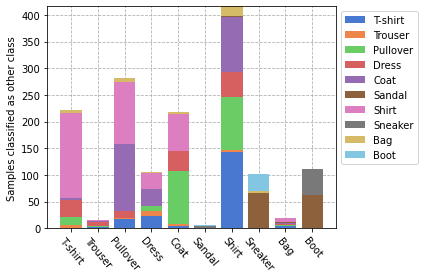

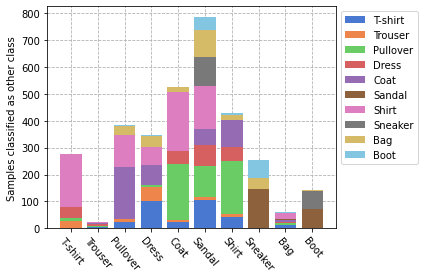

In [9]:
plot_wrong(cm_399, 'cm_399')
plot_wrong(cm_199, 'cm_199')
plot_wrong(cm_c99, 'cm_c99')
# plot_wrong(cm_395,'cm_395')
# plot_wrong(cm_195,'cm_195')
# plot_wrong(cm_c95,'cm_c95')